### K-NN (alborytm k najbliższych sąsiadów)

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load data
df = pd.read_parquet('./IDS2017/Final/Combined.parquet')
print(df.columns)

# Encodowanie Label i rozdzielenie od reszty danych
label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Label'])

X = df.drop('Label', axis=1)
y = df['Label']

# Podział danych na testowe i treningowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale (polecało zrobić)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Index(['Label', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Bwd Packet Length Max', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Average Packet Size', 'Avg Bwd Segment Size',
       'Fwd Header Length.1', 'Subflow Fwd Bytes', 'Subflow Bwd Bytes'],
      dtype='object')


In [5]:
# Inicjalizacja klasyfikatora K-NN
knn = KNeighborsClassifier(n_neighbors=5)

# Uczenie modelu
knn.fit(X_train_scaled, y_train)

# Przewidywanie na zbiorze testowym
y_pred = knn.predict(X_test_scaled)

# Ocena dokładności
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9904207749443394

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    203048
           1       1.00      1.00      1.00     25437
           2       0.97      0.67      0.79      2072
           3       0.97      0.97      0.97     34590
           4       0.93      0.98      0.95      1054
           5       0.99      0.99      0.99      1042
           6       1.00      1.00      1.00         2

    accuracy                           0.99    267245
   macro avg       0.98      0.94      0.96    267245
weighted avg       0.99      0.99      0.99    267245



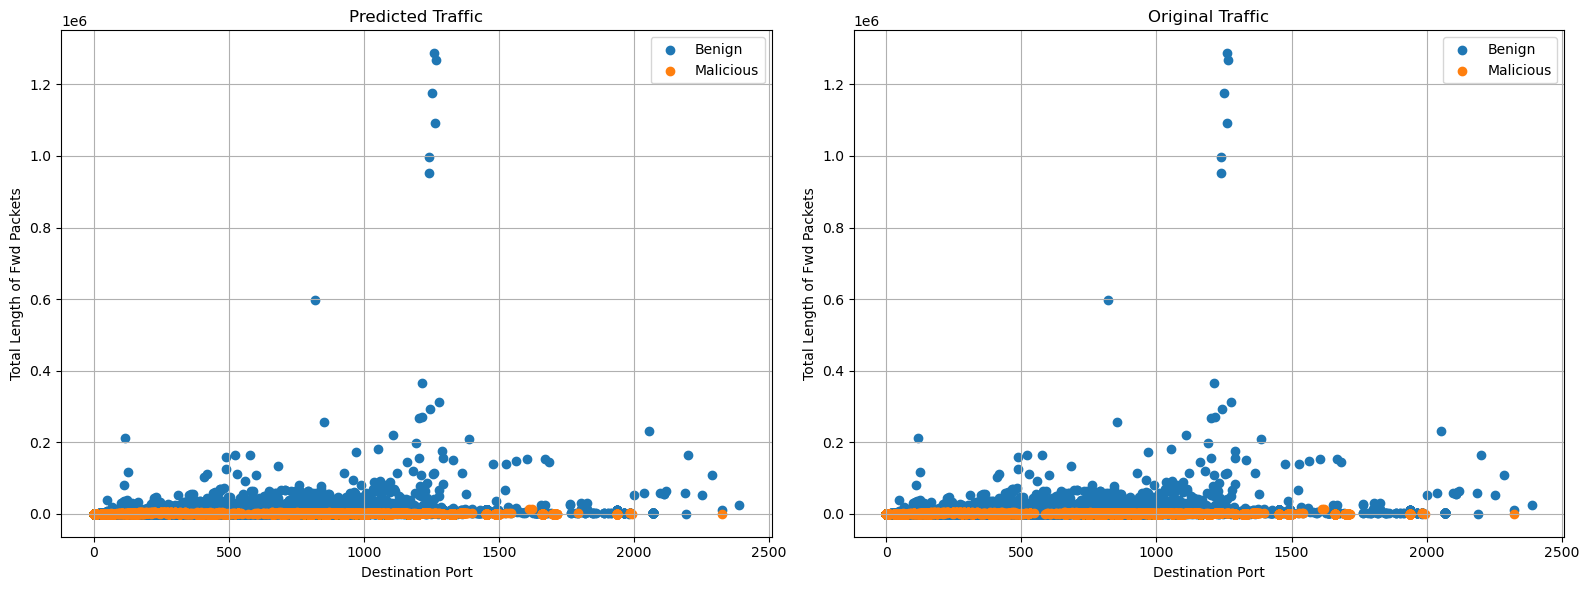

In [7]:
# Dziwne fikołki żeby narysować ploty do porównania

# Filtrowanie na Benign/Malicious na podstawie oryginalnych etykiet
df_test_original = X_test.copy()
df_test_original['Label'] = y_test
df_test_original['Original_Label'] = df.loc[df_test_original.index, 'Label']

df_test_original['Label'] = label_encoder.inverse_transform(df_test_original['Label'])
df_test_original['Original_Label'] = label_encoder.inverse_transform(df_test_original['Original_Label'])

benign_original = df_test_original[df_test_original['Original_Label'] == 'BENIGN']
malicious_original = df_test_original[df_test_original['Original_Label'] != 'BENIGN']

# Filtrowanie na Benign/Malicious na podstawie przewidzianych etykiet
y_pred = knn.predict(X_test_scaled)
df_test = X_test.copy()
df_test['Label'] = y_test
df_test['Predicted_Label'] = y_pred

df_test['Label'] = label_encoder.inverse_transform(df_test['Label'])
df_test['Predicted_Label'] = label_encoder.inverse_transform(df_test['Predicted_Label'])

benign_data = df_test[df_test['Predicted_Label'] == 'BENIGN']
malicious_data = df_test[df_test['Predicted_Label'] != 'BENIGN']

# Plots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Benign Traffic
axs[0].scatter(benign_data['Average Packet Size'], benign_data['Total Length of Fwd Packets'], label='Benign')
axs[0].scatter(malicious_data['Average Packet Size'], malicious_data['Total Length of Fwd Packets'], label='Malicious')
axs[0].set_title('Predicted Traffic')
axs[0].set_xlabel('Destination Port')
axs[0].set_ylabel('Total Length of Fwd Packets')
axs[0].legend()
axs[0].grid(True)

# Malicious Traffic
axs[1].scatter(benign_original['Average Packet Size'], benign_original['Total Length of Fwd Packets'], label='Benign')
axs[1].scatter(malicious_original['Average Packet Size'], malicious_original['Total Length of Fwd Packets'], label='Malicious')
axs[1].set_title('Original Traffic')
axs[1].set_xlabel('Destination Port')
axs[1].set_ylabel('Total Length of Fwd Packets')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()